In [1]:
import numpy as np
import math
import scipy.integrate as integrate
import matplotlib.pyplot as pyplot

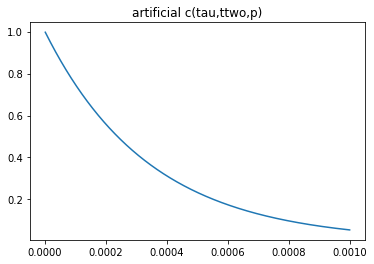

In [2]:
def artificial_c(t, ttwo = 343.43e-6, p=1): 
    return math.e**((-t/ttwo)**p);



t_test_vals = np.linspace(1e-6,1e-3,5000);
pyplot.title("artificial c(tau,ttwo,p)");
pyplot.plot(t_test_vals,artificial_c(t_test_vals))



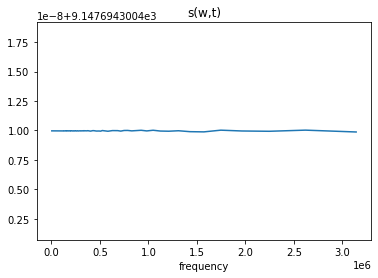

In [3]:
def s(t): 
    return -math.pi*np.log(artificial_c(t))/t, math.pi/t;

pyplot.title("s(w,t)");
pyplot.xlabel("frequency")
pyplot.plot(s(t_test_vals)[1],s(t_test_vals)[0])


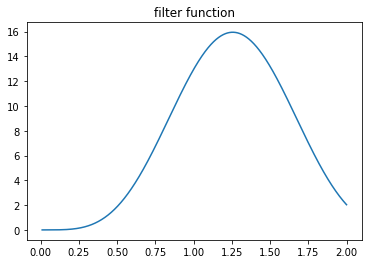

In [4]:


# define the filter function
def filter_function(w,t, tpi=100e-9):
    t1 = (t + tpi)/2; 
    
    return ( abs( 1 + np.exp(1j*w*t) - 2*np.exp(1j*w*t1)*np.cos(w*tpi/2) ) )**2

# plot the filter function

t = 5e-6;
w = np.linspace(0.01e6, 2e6, 5000); # rad/s
FF2 = filter_function(w,t)
pyplot.title("filter function");
pyplot.plot(w/1e6, FF2);

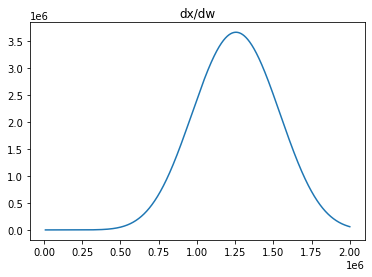

In [5]:

# dx is the dx/dw
def dx(w, t):

    filter_function_vals = filter_function(w,t);
    return 0.5*math.pi * s(t)[0] * filter_function_vals **(2);


pyplot.title("dx/dw");
dx_vals = dx(w,t=t);
pyplot.plot(w,dx_vals);

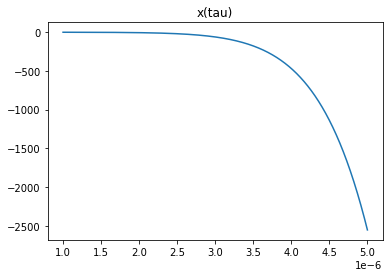

In [6]:

def x_quad(t):
    return integrate.quad(dx,0,math.inf,args=(t))[0];

def x_trapz(t):
    w = np.linspace(0.01e7,3000,10000);
    dx_vals = dx(w,t);
    return integrate.trapz(dx_vals, w);

def x(t):
    x_t_vals = np.array(t);
    for i in range(0,len(t)):
        x_t_vals[i] = (x_trapz(t[i]));
    return x_t_vals;



t_range = np.linspace(1e-6,5e-6,5000);
x_vals = x(t_range);

pyplot.title("x(tau)");
pyplot.plot(t_range,x_vals);

In [7]:

def c(t):
    return np.exp(-x(t));



t_range = np.logspace(1e-6,100e-6,5000);
c_vals = c(t_range);
pyplot.title("c(t)");
pyplot.plot(t_range,c_vals);


C:\Users\apun\AppData\Local\Temp/ipykernel_18276/1856045313.py:2: RuntimeWarning: divide by zero encountered in log
  return -math.pi*np.log(artificial_c(t))/t, math.pi/t;
